# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [62]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,movie,transcript,released_year,movie_name
beekeeper,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,beekeeper
ferrari,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,ferrari
icarus,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2017,icarus
napolean,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,napolean
percy jackson,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,percy jackson
pulp fiction,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,1994,pulp fiction
suzume,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2022,suzume
the old oak,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2024,the old oak
true detective,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,true detective
wonka,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,wonka


In [63]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,movie,transcript,released_year,movie_name,polarity,subjectivity
beekeeper,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,beekeeper,-0.013863,0.519703
ferrari,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,ferrari,0.106936,0.448186
icarus,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2017,icarus,0.111143,0.445012
napolean,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,napolean,0.124079,0.496181
percy jackson,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,percy jackson,0.084838,0.521637
pulp fiction,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,1994,pulp fiction,0.074314,0.484081
suzume,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2022,suzume,0.119902,0.481274
the old oak,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2024,the old oak,-0.003530,0.514573
true detective,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,true detective,-0.120538,0.571617
wonka,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,wonka,0.117762,0.550708


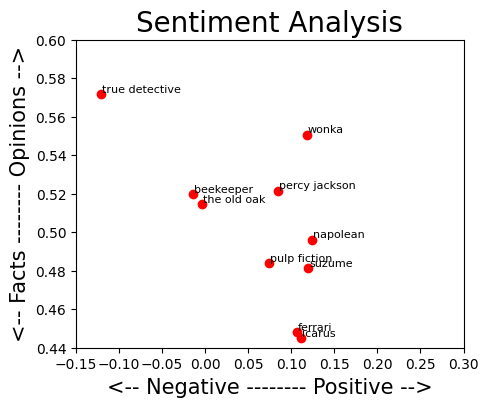

In [64]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 4]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data['movie_name'][index], fontsize=8)
    plt.xlim(-.15, .30)
    plt.ylim(.44, .60)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [65]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [66]:
# Let's take a look at our data again
data

,movie,transcript,released_year,movie_name,polarity,subjectivity
beekeeper,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,beekeeper,-0.013863,0.519703
ferrari,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,ferrari,0.106936,0.448186
icarus,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2017,icarus,0.111143,0.445012
napolean,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,napolean,0.124079,0.496181
percy jackson,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,percy jackson,0.084838,0.521637
pulp fiction,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,1994,pulp fiction,0.074314,0.484081
suzume,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2022,suzume,0.119902,0.481274
the old oak,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2024,the old oak,-0.003530,0.514573
true detective,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,true detective,-0.120538,0.571617
wonka,transcript,MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY K...,2023,wonka,0.117762,0.550708


In [67]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY KUBRICKTV SERIESTV SHOW TRANSCRIPTSCOMEDYSTAND-UP COMEDY TRANSCRIPTSGEORGE CARLINDAVE CHAPPELLEINTERVIEWSPLAYBOY INTERVIEWSMUSICHISTORYBOOKSMenuMOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY KUBRICKTV SERIESTV SHOW TRANSCRIPTSCOMEDYSTAND-UP COMEDY TRANSCRIPTSGEORGE CARLINDAVE CHAPPELLEINTERVIEWSPLAYBOY INTERVIEWSMUSICHISTORYBOOKS SearchSearch  MOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY KUBRICKTV SERIESTV SHOW TRANSCRIPTSCOMEDYSTAND-UP COMEDY TRANSCRIPTSGEORGE CARLINDAVE CHAPPELLEINTERVIEWSPLAYBOY INTERVIEWSMUSICHISTORYBOOKSMenuMOVIESMOVIE REVIEWSMOVIE TRANSCRIPTSSTANLEY KUBRICKTV SERIESTV SHOW TRANSCRIPTSCOMEDYSTAND-UP COMEDY TRANSCRIPTSGEORGE CARLINDAVE CHAPPELLEINTERVIEWSPLAYBOY INTERVIEWSMUSICHISTORYBOOKS SearchSearch MOVIES The Beekeeper (2024) | Transcript January 30, 2024 One man\'s brutal campaign for vengeance takes on national stakes after he is revealed to be a former operative of a powerful and clandestine organization known as "

In [68]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [69]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [70]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.02136544011544012,
  0.002961760461760477,
  -0.07125519588206158,
  -0.1582423258559622,
  -0.0630275974025974,
  0.09700552491648379,
  -0.04809920634920635,
  0.05928642290249432,
  -0.026507626488095234,
  0.07118717440751339],
 [0.13732323232323232,
  0.21393650793650792,
  0.16639790764790766,
  0.13207920551670552,
  0.05093344155844156,
  0.07143247462919597,
  0.021335323902288185,
  0.1343638541751749,
  0.09151967342071506,
  0.0690461432506887],
 [0.08127340823970039,
  0.04852791538358549,
  0.17966297021091537,
  0.11157407407407406,
  0.10436217462191487,
  0.08207589285714288,
  0.22587987230306503,
  0.07318320245645828,
  0.10277573352573352,
  0.12818288403515676],
 [0.05207602339181287,
  0.03798199385155907,
  0.17202008438421482,
  0.12371948973012803,
  0.20992965367965366,
  0.12166950113378688,
  0.193858024691358,
  0.14428661616161617,
  0.08033670033670029,
  0.11485959353146855],
 [0.11666666666666667,
  0.08122222222222222,
  0.015519323671497585,
  -

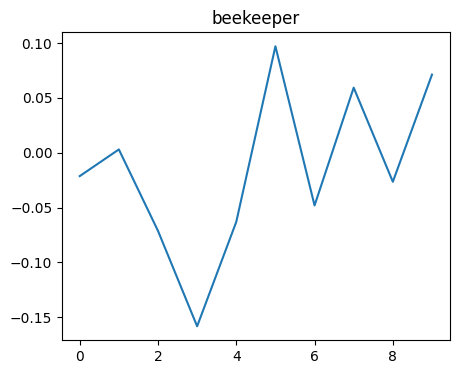

In [71]:
# Show the plot for one movie
plt.plot(polarity_transcript[0])
plt.title(data['released_year'].index[0])
plt.show()

* 1) Beekeeper has mostly positive tone, except,just before the interval the tone of the movie dips to highly negative .

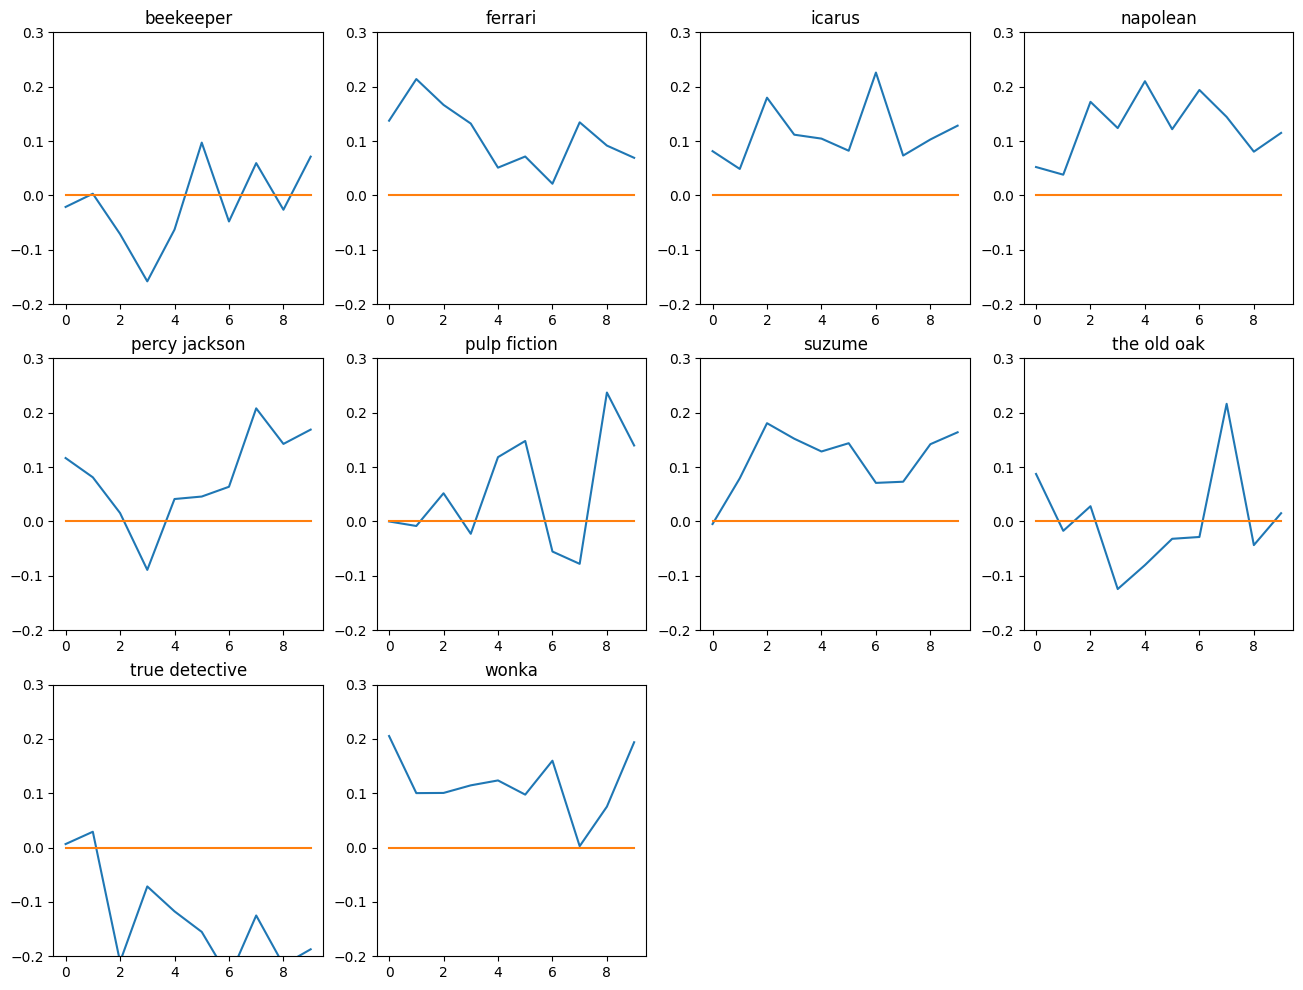

In [72]:
# Show the plot for all movies
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['movie_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Overview
1) Ferrari,Icarus,Napolean,Suzume and Wonka are positive emotion movies with little to no use of negative words
2) Beekeeper,Percy Jackson, pulp fiction and the old oak are mostly positive tone movies with an occasional dip towards negative emotion in the movie.
3) True Detective appears to be a negative toned and dark movie.

### Assignments:
1. Classify all movies accordig to Polarity and Subjectivity.
2. Modify the number of sections the movie routine is split into and see how the charts over time change and again classify all movie accordig to Polarity and Subjectivity.


In [73]:
# Define thresholds for polarity and subjectivity
positive_threshold = 0.1
negative_threshold = -0.1
subjective_threshold = 0.5
objective_threshold = 0.5

# Classify movies based on polarity and subjectivity
def classify_movie(polarity, subjectivity):
    if polarity > positive_threshold and subjectivity > subjective_threshold:
        return "Positive and Subjective"
    elif polarity < negative_threshold and subjectivity > subjective_threshold:
        return "Negative and Subjective"
    elif polarity > positive_threshold and subjectivity < objective_threshold:
        return "Positive and Objective"
    elif polarity < negative_threshold and subjectivity < objective_threshold:
        return "Negative and Objective"
    elif polarity > positive_threshold:
        return "Positive"
    elif polarity < negative_threshold:
        return "Negative"
    elif subjectivity > subjective_threshold:
        return "Subjective"
    else:
        return "Objective"

# Apply classification to each movie in the DataFrame
data['classification'] = data.apply(lambda x: classify_movie(x['polarity'], x['subjectivity']), axis=1)

# Display the DataFrame with classification
print(data[['released_year', 'classification']])


               released_year           classification
beekeeper               2023               Subjective
ferrari                 2023   Positive and Objective
icarus                  2017   Positive and Objective
napolean                2023   Positive and Objective
percy jackson           2023               Subjective
pulp fiction            1994                Objective
suzume                  2022   Positive and Objective
the old oak             2024               Subjective
true detective          2023  Negative and Subjective
wonka                   2023  Positive and Subjective


In [74]:
# Split each routine into a different number of sections
num_sections = 4  # Change this number as desired
list_pieces = []
for t in data.transcript:
    split = split_text(t, n=num_sections)
    list_pieces.append(split)

# Calculate polarity for each section of each movie routine
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = [TextBlob(p).sentiment.polarity for p in lp]
    polarity_transcript.append(polarity_piece)

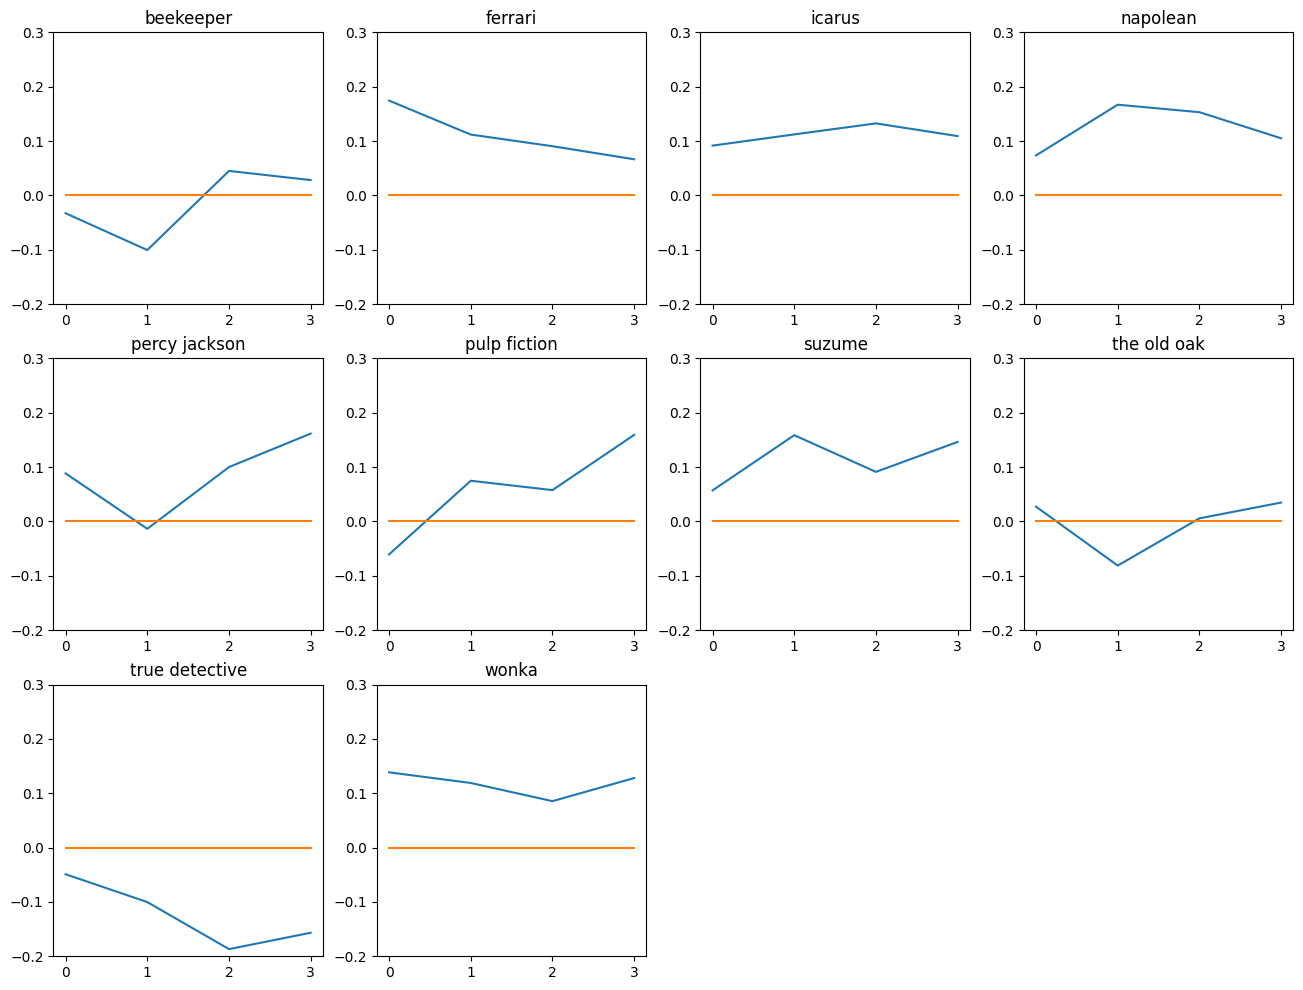

In [75]:
# Plot the polarity trends over time for each movie
plt.rcParams['figure.figsize'] = [16, 12]
for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, num_sections), np.zeros(num_sections))
    plt.title(data['movie_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
plt.show()


### Observations
By changing the number of sections we can track the change in sentiments along the movie much better.
Though the overall sentiments of the movie still remain very similar.
1) Ferrari,Icarus,Napolean,Suzume and Wonka are positive sentiment movies with little to no use of negative words
2) Beekeeper,Percy Jackson, pulp fiction and the old oak are mostly positive sentiment movies with an occasional dip towards negative sentiment in their runtime.
3) True Detective appears to be a negative sentiment and dark movie.

In [76]:
# Define thresholds for polarity and subjectivity
positive_threshold = 0.1
negative_threshold = -0.1
subjective_threshold = 0.5
objective_threshold = 0.5

# Classify movies based on polarity and subjectivity
def classify_movie(polarity, subjectivity):
    if polarity > positive_threshold and subjectivity > subjective_threshold:
        return "Positive and Subjective"
    elif polarity < negative_threshold and subjectivity > subjective_threshold:
        return "Negative and Subjective"
    elif polarity > positive_threshold and subjectivity < objective_threshold:
        return "Positive and Objective"
    elif polarity < negative_threshold and subjectivity < objective_threshold:
        return "Negative and Objective"
    elif polarity > positive_threshold:
        return "Positive"
    elif polarity < negative_threshold:
        return "Negative"
    elif subjectivity > subjective_threshold:
        return "Subjective"
    else:
        return "Objective"

# Calculate average polarity and subjectivity for each movie
data['polarity'] = [np.mean(p) for p in polarity_transcript]
data['subjectivity'] = [TextBlob(t).sentiment.subjectivity for t in data.transcript]

# Apply classification to each movie in the DataFrame
data['classification'] = data.apply(lambda x: classify_movie(x['polarity'], x['subjectivity']), axis=1)

# Display the DataFrame with classification
print(data[['released_year', 'classification']])

               released_year           classification
beekeeper               2023               Subjective
ferrari                 2023   Positive and Objective
icarus                  2017   Positive and Objective
napolean                2023   Positive and Objective
percy jackson           2023               Subjective
pulp fiction            1994                Objective
suzume                  2022   Positive and Objective
the old oak             2024               Subjective
true detective          2023  Negative and Subjective
wonka                   2023  Positive and Subjective
